In [ ]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import random
import math
from statistics import mean
sns.set_style('whitegrid')

#1. Using Monte Carlo method, simulate 1000 paths across time for the GBPUSD FX spot rate. 

[54, 275, 90, 788, 418]


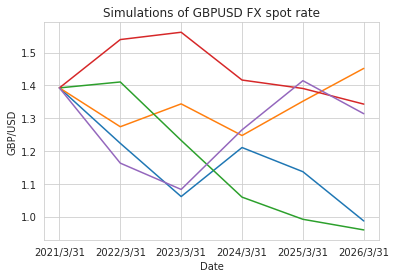

In [ ]:
#parameters definition 
V0= 1.3925 # spot rate at trade date 
r = 0 #risk free rate
sigma = 0.1
T = 5 # years
dt = 1 # frequency is monthly
times = 1000 #number of simulation 
N = int(T/dt) #number of steps within each simulation


def paths(V0,r,sigma,T,dt,times): 
    paths = np.zeros((int(T/dt)+1,times))
    paths[0]=V0
    np.random.seed(123)
    for j in range(times):
    # simulate first 10 years
        for t in range(1,int(T/dt)+1): 
            # Euler discretization
            Z = np.random.normal(0,1)
            paths[t,j] =paths[t-1,j]+r*dt*paths[t-1,j]+paths[t-1,j]*sigma*np.sqrt(dt)*Z
    return paths
# randomly select 5 paths
random.seed(123)
rnumber = [random.randint(1, 1000) for x in range(5)]
path = paths(V0,r,sigma,T,dt,times)
print(rnumber)

#Plot the randomly selected 5 paths
dates = ["2021/3/31", "2022/3/31", "2023/3/31","2024/3/31","2025/3/31","2026/3/31"]

for number in rnumber: 
    plt.plot(dates,path[:,number])
plt.title('Simulations of GBPUSD FX spot rate')
plt.xlabel('Date')
plt.ylabel('GBP/USD')
plt.show()

#2. Caluclate IRR

convert GBP cashflow into fund currency USD


In [ ]:
cashflow_list =np.array([-100, 15, 15, 15,15,115],dtype=float)
cashflow_matrix = np.tile(cashflow_list,(1000,1))
cashflow_usd = cashflow_matrix* np.transpose(path)
cashflow_usd

array([[-139.25      ,   18.61988908,   20.47693524,   21.05638847,
          17.88467581,  129.18232145],
       [-139.25      ,   24.33693807,   18.43114382,   17.64060879,
          19.87379742,  139.15962242],
       [-139.25      ,   19.46947655,   19.28508315,   22.16124044,
          20.74535436,  151.98628509],
       ...,
       [-139.25      ,   17.6844827 ,   18.98951386,   20.92685029,
          23.00109991,  188.02066507],
       [-139.25      ,   18.71382899,   20.49884484,   16.58318907,
          17.87410383,  122.53734785],
       [-139.25      ,   18.54335758,   15.91272666,   12.95341278,
          14.13712439,   93.71107936]])

calculate corresponding IRR for each of simulated path



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


95th percentile of irr :  0.23447550386190408
50th percentile of irr :  0.14978499710559845
5th percentile of irr :  0.0619545005261898
mean of irr: 0.14901496
minimum of irr: -0.00552
volitility of irr 0.05313088


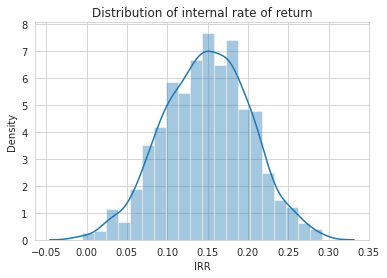

In [ ]:
def irr(cashflow):
  irr = []
  for i in cashflow: 
    irr.append(round(np.irr(i), 5))
  irr = np.array(irr, dtype=np.float32)
  #plot the distribution 
  sns.distplot(irr)
  plt.title('Distribution of internal rate of return')
  plt.xlabel('IRR')
  plt.ylabel('Density')
  print("95th percentile of irr : ",
        np.percentile(irr, 95))
  print("50th percentile of irr : ",
        np.percentile(irr, 50))
  print("5th percentile of irr : ",
        np.percentile(irr, 5))
  print ("mean of irr:", mean(irr))
  print ("minimum of irr:", min(irr))
  print("volitility of irr", irr.std())
irr(cashflow_usd)

#3. Calculate Premium

calculate option's fair market value 

In [ ]:
r = 0 
T = 5
K = 1.3925 #strike price 
N = 100 # notional value 
times = 1000 #number of simulation 
# Calculating the Monte Carlo estimator
P0 = math.exp(-r * T) * sum(np.maximum(K-path[-1],0)) / times
premium = P0 * N
print("GBPUSD European Put Option value is", premium, " million USD")

GBPUSD European Put Option value is 11.956709937381884  million USD


#4. IRR of Hedged Portfolio

In [ ]:
#base case IRR 
cashflow_hedged =np.array([-100, 15, 15, 15,15,115],dtype=float)
base_irr = round(np.irr(cashflow_list), 5)
base_irr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  This is separate from the ipykernel package so we can avoid doing imports until


0.15

In [ ]:
# including premium
cashflow_hedged[0]= cashflow_list[0] - premium

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


95th percentile of irr :  0.19925150051712986
50th percentile of irr :  0.12241500243544579
5th percentile of irr :  0.08575549758970737
mean of irr: 0.13108923
minimum of irr: 0.04013
volitility of irr 0.03545477


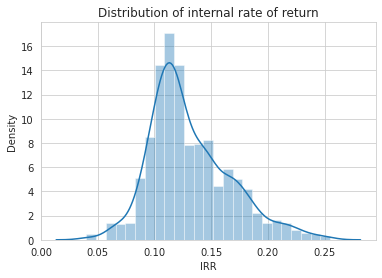

In [ ]:
#including option payoff 
payoff = np.maximum(K-path[-1],0)*N
hedged_matrix = np.tile(cashflow_hedged,(1000,1))
hedged_matrix[:,-1] = hedged_matrix[:,-1]+payoff
hedged_matrix
hedged_usd = hedged_matrix* np.transpose(path)
irr(hedged_usd)

Impact of the put option on the portfolio FX risk:

By comparing the IRR distribution in (b) and (d) (with and without hedged put option), we find that IRR of the hedged portfolio are more right(postive)-skewed than unhedged portfolio with lower IRR mean. However, hedged put option reduces the volatilidy of internal rate of return and the probability of negative IRR, which reduces the portfolio FX risk. 